# Evaluation of MSSW on AGRAW2

## Imports

In [1]:
import numpy as np
import pandas as pd
import sklearn

## AGRAW2 dataset locations

In [2]:
abrupt_agraw2_path = '../Datasets_concept_drift/synthetic_data/abrupt_drift/agraw2_1_abrupt_drift_0_noise_balanced.arff'
gradual_agraw2_paths = [
    '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw2_1_gradual_drift_0_noise_balanced_05.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw2_1_gradual_drift_0_noise_balanced_1.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw2_1_gradual_drift_0_noise_balanced_5.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw2_1_gradual_drift_0_noise_balanced_10.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw2_1_gradual_drift_0_noise_balanced_20.arff'
]

all_agraw2_data_paths = [abrupt_agraw2_path] + gradual_agraw2_paths

## Accept and preprocess AGRAW2 datasets

In [3]:
from eval_helpers import accepting
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


agraw2_exclude_reference_batches = {}
agraw2_exclude_testing_batches = {}
agraw2_onehot_reference_batches = {}
agraw2_onehot_testing_batches = {}
agraw2_target_reference_batches = {}
agraw2_target_testing_batches = {}


# agraw2 with categories excluded
for file_path in all_agraw2_data_paths:
    df_x, df_y = accepting.get_clean_df(file_path)
    df_y = pd.DataFrame(LabelEncoder().fit_transform(df_y))

    df_x_ref, df_x_test, df_y_ref, df_y_test = sklearn.model_selection.train_test_split(
        df_x, df_y, test_size=0.7, shuffle=False)
    
    df_x_ref_num, df_x_ref_cat = accepting.divide_numeric_categorical(df_x_ref)
    df_x_test_num, df_x_test_cat = accepting.divide_numeric_categorical(df_x_test)
    
    reference_data = df_x_ref_num.to_numpy()
    testing_data = df_x_test_num.to_numpy()
    num_ref_batches = 3
    num_test_batches = 7
    ref_batches = np.array_split(reference_data, num_ref_batches)
    test_batches = np.array_split(testing_data, num_test_batches)
    
    agraw2_exclude_reference_batches[file_path] = ref_batches
    agraw2_exclude_testing_batches[file_path] = test_batches
    
print('agraw2 exclude')
print(agraw2_exclude_reference_batches)
print(agraw2_exclude_testing_batches)

# agraw2 with categories onehot encoded
for file_path in all_agraw2_data_paths:
    df_x, df_y = accepting.get_clean_df(file_path)
    df_y = pd.DataFrame(LabelEncoder().fit_transform(df_y))

    df_x_ref, df_x_test, df_y_ref, df_y_test = sklearn.model_selection.train_test_split(
        df_x, df_y, test_size=0.7, shuffle=False)
    
    df_x_ref_num, df_x_ref_cat = accepting.divide_numeric_categorical(df_x_ref)
    df_x_test_num, df_x_test_cat = accepting.divide_numeric_categorical(df_x_test)
    
    ref_index = df_x_ref_cat.index
    test_index = df_x_test_cat.index
    encoder = OneHotEncoder(sparse=False)
    encoder.fit(df_x_ref_cat)
    df_x_ref_cat_transformed = pd.DataFrame(encoder.transform(df_x_ref_cat))
    df_x_test_cat_transformed = pd.DataFrame(encoder.transform(df_x_test_cat))
    df_x_ref_cat_transformed.set_index(ref_index, inplace=True)
    df_x_test_cat_transformed.set_index(test_index, inplace=True)
    
    reference_data = df_x_ref_num.join(df_x_ref_cat_transformed, lsuffix='_num').to_numpy()
    testing_data = df_x_test_num.join(df_x_test_cat_transformed, lsuffix='_num').to_numpy()
    num_ref_batches = 3
    num_test_batches = 7
    ref_batches = np.array_split(reference_data, num_ref_batches)
    test_batches = np.array_split(testing_data, num_test_batches)
    
    agraw2_onehot_reference_batches[file_path] = ref_batches
    agraw2_onehot_testing_batches[file_path] = test_batches
    
print('agraw2 onehot')
print(agraw2_onehot_reference_batches)
print(agraw2_onehot_testing_batches)

# agraw2 with categories target encoded
for file_path in all_agraw2_data_paths:
    df_x, df_y = accepting.get_clean_df(file_path)
    df_y = pd.DataFrame(LabelEncoder().fit_transform(df_y))

    df_x_ref, df_x_test, df_y_ref, df_y_test = sklearn.model_selection.train_test_split(
        df_x, df_y, test_size=0.7, shuffle=False)
    
    df_x_ref_num, df_x_ref_cat = accepting.divide_numeric_categorical(df_x_ref)
    df_x_test_num, df_x_test_cat = accepting.divide_numeric_categorical(df_x_test)
    
    ref_index = df_x_ref_cat.index
    test_index = df_x_test_cat.index
    encoder = TargetEncoder()
    encoder.fit(df_x_ref_cat, df_y_ref)
    df_x_ref_cat_transformed = pd.DataFrame(encoder.transform(df_x_ref_cat))
    df_x_test_cat_transformed = pd.DataFrame(encoder.transform(df_x_test_cat))
    df_x_ref_cat_transformed.set_index(ref_index, inplace=True)
    df_x_test_cat_transformed.set_index(test_index, inplace=True)
    
    reference_data = df_x_ref_num.join(df_x_ref_cat_transformed, lsuffix='_num').to_numpy()
    testing_data = df_x_test_num.join(df_x_test_cat_transformed, lsuffix='_num').to_numpy()
    num_ref_batches = 3
    num_test_batches = 7
    ref_batches = np.array_split(reference_data, num_ref_batches)
    test_batches = np.array_split(testing_data, num_test_batches)
    
    agraw2_target_reference_batches[file_path] = ref_batches
    agraw2_target_testing_batches[file_path] = test_batches
    
print('agraw2 target')
print(agraw2_target_reference_batches)
print(agraw2_target_testing_batches)

df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995  138438.140611      0.000000  50.0  b'level2'   b'car8'  b'zipcode6'   
99996   90804.449088      0.000000  77.0  b'level4'  b'car13'  b'zipcode7'   
99997  106569.365368      0.000000  51.0  b'level1'   b'car8'  b'zipcode6'   
99998   84356.498251      0.000000  36.0  b'level1'  b'car18'  b'zipcode5'   
99999   87473.968095      0.000000  54.0  b'level0'  b'car11'  b'zipcode3'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   39396.704989  18582.273595  72.0  b'level1'  b'car16'  b'zipcode5'   
99996  138438.140611      0.000000  50.0  b'level2'   b'car8'  b'zipcode6'   
99997   90804.449088      0.000000  77.0  b'level4'  b'car13'  b'zipcode7'   
99998  106569.365368      0.000000  51.0  b'level1'   b'car8'  b'zipcode6'   
99999   84356.498251      0.000000  36.0  b'level1'  b'car18'  b'zipcode5'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995  111359.652359      0.000000  61.0  b'level1'  b'car15'  b'zipcode1'   
99996  147593.942041      0.000000  59.0  b'level4'  b'car17'  b'zipcode6'   
99997  123948.303642      0.000000  66.0  b'level4'  b'car11'  b'zipcode4'   
99998   71333.696488  11799.103316  58.0  b'level1'   b'car5'  b'zipcode3'   
99999   39396.704989  18582.273595  72.0  b'level1'  b'car16'  b'zipcode5'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   71983.840341  19299.479268  45.0  b'level2'   b'car7'  b'zipcode8'   
99996   67069.529360  46815.593925  30.0  b'level3'  b'car14'  b'zipcode5'   
99997  104177.660368      0.000000  48.0  b'level1'   b'car9'  b'zipcode5'   
99998  143771.939648      0.000000  71.0  b'level3'  b'car20'  b'zipcode6'   
99999   36163.251675  59471.494372  53.0  b'level0'  b'car18'  b'zipcode5'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   68222.567612  33141.251698  41.0  b'level2'   b'car8'  b'zipcode1'   
99996   50428.438359  59324.405616  26.0  b'level4'   b'car1'  b'zipcode2'   
99997  112914.978798      0.000000  41.0  b'level1'   b'car4'  b'zipcode4'   
99998   90178.866228      0.000000  60.0  b'level1'  b'car13'  b'zipcode6'   
99999   37082.251910  22468.199196  43.0  b'level2'  b'car20'  b'zipcode1'   

             hvalue  hyears           loan      class  
0   

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   80507.066152      0.000000  59.0  b'level1'   b'car8'  b'zipcode7'   
99996   43953.844702  23112.195013  36.0  b'level1'  b'car19'  b'zipcode6'   
99997  127958.679326      0.000000  59.0  b'level2'   b'car8'  b'zipcode7'   
99998   58150.729498  54772.811468  66.0  b'level3'  b'car15'  b'zipcode8'   
99999  120616.756315      0.000000  59.0  b'level2'   b'car3'  b'zipcode3'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995  138438.140611      0.000000  50.0  b'level2'   b'car8'  b'zipcode6'   
99996   90804.449088      0.000000  77.0  b'level4'  b'car13'  b'zipcode7'   
99997  106569.365368      0.000000  51.0  b'level1'   b'car8'  b'zipcode6'   
99998   84356.498251      0.000000  36.0  b'level1'  b'car18'  b'zipcode5'   
99999   87473.968095      0.000000  54.0  b'level0'  b'car11'  b'zipcode3'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   39396.704989  18582.273595  72.0  b'level1'  b'car16'  b'zipcode5'   
99996  138438.140611      0.000000  50.0  b'level2'   b'car8'  b'zipcode6'   
99997   90804.449088      0.000000  77.0  b'level4'  b'car13'  b'zipcode7'   
99998  106569.365368      0.000000  51.0  b'level1'   b'car8'  b'zipcode6'   
99999   84356.498251      0.000000  36.0  b'level1'  b'car18'  b'zipcode5'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995  111359.652359      0.000000  61.0  b'level1'  b'car15'  b'zipcode1'   
99996  147593.942041      0.000000  59.0  b'level4'  b'car17'  b'zipcode6'   
99997  123948.303642      0.000000  66.0  b'level4'  b'car11'  b'zipcode4'   
99998   71333.696488  11799.103316  58.0  b'level1'   b'car5'  b'zipcode3'   
99999   39396.704989  18582.273595  72.0  b'level1'  b'car16'  b'zipcode5'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   71983.840341  19299.479268  45.0  b'level2'   b'car7'  b'zipcode8'   
99996   67069.529360  46815.593925  30.0  b'level3'  b'car14'  b'zipcode5'   
99997  104177.660368      0.000000  48.0  b'level1'   b'car9'  b'zipcode5'   
99998  143771.939648      0.000000  71.0  b'level3'  b'car20'  b'zipcode6'   
99999   36163.251675  59471.494372  53.0  b'level0'  b'car18'  b'zipcode5'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   68222.567612  33141.251698  41.0  b'level2'   b'car8'  b'zipcode1'   
99996   50428.438359  59324.405616  26.0  b'level4'   b'car1'  b'zipcode2'   
99997  112914.978798      0.000000  41.0  b'level1'   b'car4'  b'zipcode4'   
99998   90178.866228      0.000000  60.0  b'level1'  b'car13'  b'zipcode6'   
99999   37082.251910  22468.199196  43.0  b'level2'  b'car20'  b'zipcode1'   

             hvalue  hyears           loan      class  
0   

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   80507.066152      0.000000  59.0  b'level1'   b'car8'  b'zipcode7'   
99996   43953.844702  23112.195013  36.0  b'level1'  b'car19'  b'zipcode6'   
99997  127958.679326      0.000000  59.0  b'level2'   b'car8'  b'zipcode7'   
99998   58150.729498  54772.811468  66.0  b'level3'  b'car15'  b'zipcode8'   
99999  120616.756315      0.000000  59.0  b'level2'   b'car3'  b'zipcode3'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


agraw2 onehot
{'../Datasets_concept_drift/synthetic_data/abrupt_drift/agraw2_1_abrupt_drift_0_noise_balanced.arff': [array([[5.82274142e+04, 4.29214358e+04, 7.70000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.56289824e+04, 2.23631436e+04, 2.70000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.46598421e+05, 0.00000000e+00, 2.60000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.48369729e+04, 7.16794719e+04, 3.90000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.03088864e+04, 6.70882404e+04, 5.20000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.50239030e+04, 4.07706319e+04, 5.90000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]), array([[1.28572172e+05, 0.00000000e+00, 6.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.28746914e+04, 4.94224358e+04, 4.9

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issue

df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   39396.704989  18582.273595  72.0  b'level1'  b'car16'  b'zipcode5'   
99996  138438.140611      0.000000  50.0  b'level2'   b'car8'  b'zipcode6'   
99997   90804.449088      0.000000  77.0  b'level4'  b'car13'  b'zipcode7'   
99998  106569.365368      0.000000  51.0  b'level1'   b'car8'  b'zipcode6'   
99999   84356.498251      0.000000  36.0  b'level1'  b'car18'  b'zipcode5'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issue

df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995  111359.652359      0.000000  61.0  b'level1'  b'car15'  b'zipcode1'   
99996  147593.942041      0.000000  59.0  b'level4'  b'car17'  b'zipcode6'   
99997  123948.303642      0.000000  66.0  b'level4'  b'car11'  b'zipcode4'   
99998   71333.696488  11799.103316  58.0  b'level1'   b'car5'  b'zipcode3'   
99999   39396.704989  18582.273595  72.0  b'level1'  b'car16'  b'zipcode5'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issue

df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   71983.840341  19299.479268  45.0  b'level2'   b'car7'  b'zipcode8'   
99996   67069.529360  46815.593925  30.0  b'level3'  b'car14'  b'zipcode5'   
99997  104177.660368      0.000000  48.0  b'level1'   b'car9'  b'zipcode5'   
99998  143771.939648      0.000000  71.0  b'level3'  b'car20'  b'zipcode6'   
99999   36163.251675  59471.494372  53.0  b'level0'  b'car18'  b'zipcode5'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issue

df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   68222.567612  33141.251698  41.0  b'level2'   b'car8'  b'zipcode1'   
99996   50428.438359  59324.405616  26.0  b'level4'   b'car1'  b'zipcode2'   
99997  112914.978798      0.000000  41.0  b'level1'   b'car4'  b'zipcode4'   
99998   90178.866228      0.000000  60.0  b'level1'  b'car13'  b'zipcode6'   
99999   37082.251910  22468.199196  43.0  b'level2'  b'car20'  b'zipcode1'   

             hvalue  hyears           loan      class  
0   

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issue

df               salary    commission   age     elevel       car      zipcode  \
0       58227.414161  42921.435776  77.0  b'level2'   b'car6'  b'zipcode5'   
1       55628.982351  22363.143593  27.0  b'level3'  b'car17'  b'zipcode3'   
2      146598.421289      0.000000  26.0  b'level2'  b'car13'  b'zipcode5'   
3       87701.290931      0.000000  52.0  b'level4'  b'car16'  b'zipcode5'   
4       83888.656723      0.000000  72.0  b'level3'  b'car11'  b'zipcode5'   
...              ...           ...   ...        ...       ...          ...   
99995   80507.066152      0.000000  59.0  b'level1'   b'car8'  b'zipcode7'   
99996   43953.844702  23112.195013  36.0  b'level1'  b'car19'  b'zipcode6'   
99997  127958.679326      0.000000  59.0  b'level2'   b'car8'  b'zipcode7'   
99998   58150.729498  54772.811468  66.0  b'level3'  b'car15'  b'zipcode8'   
99999  120616.756315      0.000000  59.0  b'level2'   b'car3'  b'zipcode3'   

              hvalue  hyears           loan      class  
0  

C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issue

agraw2 target
{'../Datasets_concept_drift/synthetic_data/abrupt_drift/agraw2_1_abrupt_drift_0_noise_balanced.arff': [array([[5.82274142e+04, 4.29214358e+04, 7.70000000e+01, ...,
        5.00332226e-01, 4.81505516e-01, 5.08792497e-01],
       [5.56289824e+04, 2.23631436e+04, 2.70000000e+01, ...,
        4.96433903e-01, 5.04279131e-01, 5.12541553e-01],
       [1.46598421e+05, 0.00000000e+00, 2.60000000e+01, ...,
        5.00332226e-01, 4.92203390e-01, 5.08792497e-01],
       ...,
       [2.48369729e+04, 7.16794719e+04, 3.90000000e+01, ...,
        5.03981027e-01, 5.04279131e-01, 5.12541553e-01],
       [6.03088864e+04, 6.70882404e+04, 5.20000000e+01, ...,
        5.03981027e-01, 4.95765472e-01, 5.06815366e-01],
       [6.50239030e+04, 4.07706319e+04, 5.90000000e+01, ...,
        4.96433903e-01, 4.95675316e-01, 4.97927768e-01]]), array([[1.28572172e+05, 0.00000000e+00, 6.30000000e+01, ...,
        4.99582847e-01, 5.07061197e-01, 4.81747457e-01],
       [3.28746914e+04, 4.94224358e+04, 4.9

## AGRAW2 with categories excluded

### Find the best tol and max_iter (the drift type is irrelevant)

In [4]:
from core import mssw_preprocessing
from eval_helpers import kmeans_verbose_helpers


weighted_joined_reference_data, _, _ = mssw_preprocessing.mssw_preprocess(
    agraw2_exclude_reference_batches[abrupt_agraw2_path], agraw2_exclude_testing_batches[abrupt_agraw2_path])

filename = 'agraw2_exclude_new_output.txt'
kmeans_verbose_helpers.write_verbose_kmeans_to_file(filename, weighted_joined_reference_data,
                             n_clusters=2, n_init=100, max_iter=500, tol=0, random_state=1053)
output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=100)
kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)

something
random state: 1053
total number of results: 100
maximum number of iterations: 12
minimum initial inertia: 515.1616044426127
maximum initial inertia: 1459.307250586127
number of unique final inertia values: 1
minimum final inertia: 447.3918286203024
maximum final inertia: 447.3918286203024
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0


## Try different numbers of clusters

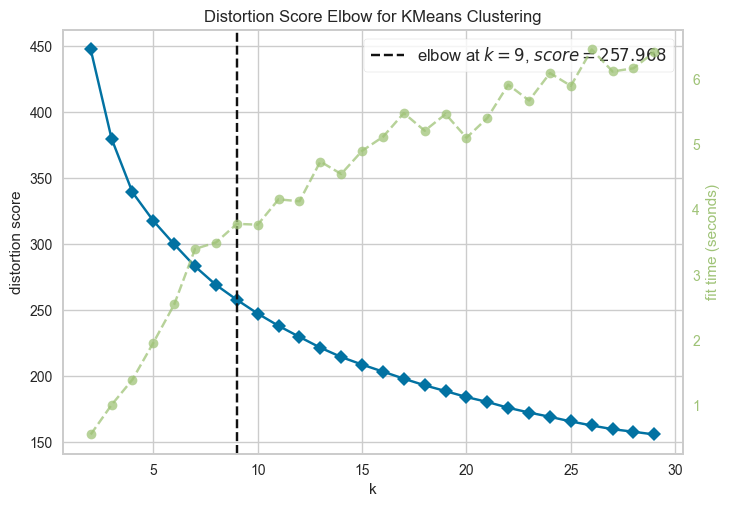

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=10000, n_clusters=29, n_init=100,
                                  random_state=0, tol=0),
                 k=(2, 30))

In [5]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans


kmeans = KMeans(
    n_init=100,
    max_iter=10000,
    tol=0,
    random_state=0
)

kelbow_visualizer(kmeans, weighted_joined_reference_data, k=(2, 30))


### Use them for the analysis

In [6]:
from core import mssw_eval


agraw2_exclude_stats = {}
for agraw2_path in all_agraw2_data_paths:
    runs_results_bool, final_fpr_mean, fpr_std_err, final_latency_mean, latency_std_err = \
        mssw_eval.all_drifting_batches_randomness_robust(
        agraw2_exclude_reference_batches[agraw2_path],
        agraw2_exclude_testing_batches[agraw2_path],
        n_clusters=9,
        n_init=100,
        max_iter=120,
        tol=0,
        true_drift_idx=2,
        min_runs=2
    )
    agraw2_exclude_stats[agraw2_path] = {
        'runs_results_bool': runs_results_bool,
        'final_fpr_mean': final_fpr_mean,
        'fpr_std_err': fpr_std_err,
        'final_latency_mean': final_latency_mean,
        'latency_std_err': latency_std_err
    }

print('agraw2 STATS')
print(agraw2_exclude_stats)

min_runs 2
min_runs 2
min_runs 2
min_runs 2
min_runs 2
min_runs 2
agraw2 STATS
{'../Datasets_concept_drift/synthetic_data/abrupt_drift/agraw2_1_abrupt_drift_0_noise_balanced.arff': {'runs_results_bool': [[False, False, False, True, True, True, True], [False, False, False, True, True, True, True]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean': 0.25, 'latency_std_err': 0.0}, '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw2_1_gradual_drift_0_noise_balanced_05.arff': {'runs_results_bool': [[False, False, False, True, True, True, True], [False, False, False, True, True, True, True]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean': 0.25, 'latency_std_err': 0.0}, '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw2_1_gradual_drift_0_noise_balanced_1.arff': {'runs_results_bool': [[False, False, False, True, True, True, True], [False, False, False, True, True, True, True]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean

### Save the results

In [7]:
from eval_helpers import helpers


final_result_dict = {
    'type_of_data': [], 'dataset': [], 'drift': [], 'width': [], 'encoding': [],
    'n_init': [], 'max_iter': [], 'tol': [],
    'FPR_mean': [], 'latency_mean': []
}

for data_path, stats_dict in agraw2_exclude_stats.items():
    synthetic_filename_info = helpers.synthetic_data_information(data_path)
    encoding = 'exclude'
    fpr_mean = float(stats_dict['final_fpr_mean'])
    latency_mean = float(stats_dict['final_latency_mean'])
    
    final_result_dict['type_of_data'].append(synthetic_filename_info['type_of_data'])
    final_result_dict['dataset'].append(synthetic_filename_info['dataset_name'])
    final_result_dict['drift'].append(synthetic_filename_info['drift_type'])
    final_result_dict['width'].append(synthetic_filename_info['drift_width'])
    final_result_dict['encoding'].append(encoding)
    final_result_dict['n_init'].append(100)
    final_result_dict['max_iter'].append(120)
    final_result_dict['tol'].append(0)
    final_result_dict['FPR_mean'].append(fpr_mean)
    final_result_dict['latency_mean'].append(latency_mean)
    
final_result_df = pd.DataFrame.from_dict(final_result_dict)
sorted_final_result_df = final_result_df.sort_values(['drift', 'dataset', 'encoding', 'width'])
final_result_df.to_csv('agraw2_exclude_jupyter.csv', index=False)

## AGRAW2 with categories onehot encoded

### Find the best tol and max_iter (the drift type is irrelevant)

In [8]:
from core import mssw_preprocessing
from eval_helpers import kmeans_verbose_helpers


weighted_joined_reference_data, _, _ = mssw_preprocessing.mssw_preprocess(
    agraw2_onehot_reference_batches[abrupt_agraw2_path], agraw2_onehot_testing_batches[abrupt_agraw2_path])

filename = 'agraw2_onehot_new_output.txt'
kmeans_verbose_helpers.write_verbose_kmeans_to_file(filename, weighted_joined_reference_data,
                             n_clusters=2, n_init=100, max_iter=500, tol=0, random_state=1053)
output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=100)
kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)

random state: 1053
total number of results: 100
maximum number of iterations: 8
minimum initial inertia: 1237.5563664035544
maximum initial inertia: 1307.1840467835796
number of unique final inertia values: 51
minimum final inertia: 661.5972103827627
maximum final inertia: 674.2735612873132
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0


## Try different numbers of clusters

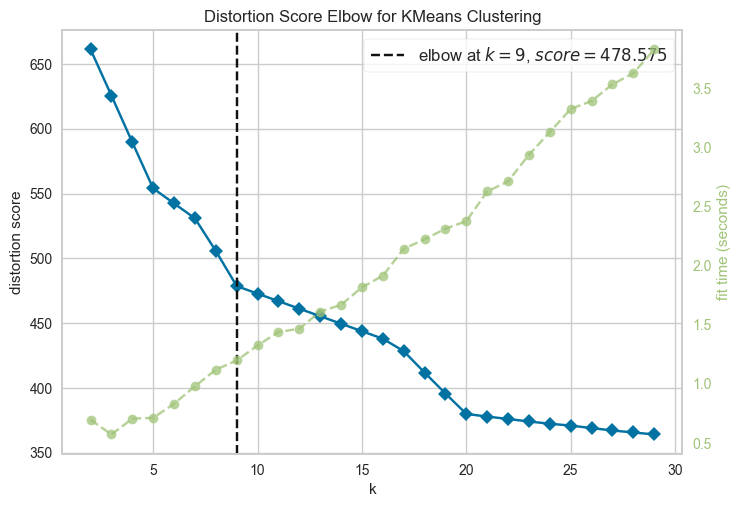

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=10000, n_clusters=29, n_init=100,
                                  random_state=0, tol=0),
                 k=(2, 30))

In [9]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans


kmeans = KMeans(
    n_init=100,
    max_iter=10000,
    tol=0,
    random_state=0
)

kelbow_visualizer(kmeans, weighted_joined_reference_data, k=(2, 30))


### Use them for the analysis

In [10]:
from core import mssw_eval


agraw2_onehot_stats = {}
for agraw2_path in all_agraw2_data_paths:
    runs_results_bool, final_fpr_mean, fpr_std_err, final_latency_mean, latency_std_err = \
        mssw_eval.all_drifting_batches_randomness_robust(
        agraw2_onehot_reference_batches[agraw2_path],
        agraw2_onehot_testing_batches[agraw2_path],
        n_clusters=9,
        n_init=100,
        max_iter=80,
        tol=0,
        true_drift_idx=2,
        min_runs=2
    )
    agraw2_onehot_stats[agraw2_path] = {
        'runs_results_bool': runs_results_bool,
        'final_fpr_mean': final_fpr_mean,
        'fpr_std_err': fpr_std_err,
        'final_latency_mean': final_latency_mean,
        'latency_std_err': latency_std_err
    }

print('agraw2 STATS')
print(agraw2_onehot_stats)

min_runs 2
min_runs 2
min_runs 2
min_runs 2
min_runs 2
min_runs 2
agraw2 STATS
{'../Datasets_concept_drift/synthetic_data/abrupt_drift/agraw2_1_abrupt_drift_0_noise_balanced.arff': {'runs_results_bool': [[False, False, False, False, False, False, False], [False, False, False, False, False, False, False]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean': 1.0, 'latency_std_err': 0.0}, '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw2_1_gradual_drift_0_noise_balanced_05.arff': {'runs_results_bool': [[False, False, False, False, False, False, False], [False, False, False, False, False, False, False]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean': 1.0, 'latency_std_err': 0.0}, '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw2_1_gradual_drift_0_noise_balanced_1.arff': {'runs_results_bool': [[False, False, False, False, False, False, False], [False, False, False, False, False, False, False]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.

### Save the results

In [11]:
from eval_helpers import helpers


final_result_dict = {
    'type_of_data': [], 'dataset': [], 'drift': [], 'width': [], 'encoding': [],
    'n_init': [], 'max_iter': [], 'tol': [],
    'FPR_mean': [], 'latency_mean': []
}

for data_path, stats_dict in agraw2_onehot_stats.items():
    synthetic_filename_info = helpers.synthetic_data_information(data_path)
    encoding = 'onehot'
    fpr_mean = float(stats_dict['final_fpr_mean'])
    latency_mean = float(stats_dict['final_latency_mean'])
    
    final_result_dict['type_of_data'].append(synthetic_filename_info['type_of_data'])
    final_result_dict['dataset'].append(synthetic_filename_info['dataset_name'])
    final_result_dict['drift'].append(synthetic_filename_info['drift_type'])
    final_result_dict['width'].append(synthetic_filename_info['drift_width'])
    final_result_dict['encoding'].append(encoding)
    final_result_dict['n_init'].append(100)
    final_result_dict['max_iter'].append(80)
    final_result_dict['tol'].append(0)
    final_result_dict['FPR_mean'].append(fpr_mean)
    final_result_dict['latency_mean'].append(latency_mean)
    
final_result_df = pd.DataFrame.from_dict(final_result_dict)
sorted_final_result_df = final_result_df.sort_values(['drift', 'dataset', 'encoding', 'width'])
final_result_df.to_csv('agraw2_onehot_jupyter.csv', index=False)

## AGRAW2 with categories target encoded

### Find the best tol and max_iter (the drift type is irrelevant)

In [12]:
from core import mssw_preprocessing
from eval_helpers import kmeans_verbose_helpers


weighted_joined_reference_data, _, _ = mssw_preprocessing.mssw_preprocess(
    agraw2_target_reference_batches[abrupt_agraw2_path], agraw2_target_testing_batches[abrupt_agraw2_path])

filename = 'agraw2_target_new_output.txt'
kmeans_verbose_helpers.write_verbose_kmeans_to_file(filename, weighted_joined_reference_data,
                             n_clusters=2, n_init=100, max_iter=500, tol=0, random_state=1053)
output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=100)
kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)

random state: 1053
total number of results: 100
maximum number of iterations: 12
minimum initial inertia: 718.6400272147839
maximum initial inertia: 1468.3565321334015
number of unique final inertia values: 3
minimum final inertia: 561.2315365494035
maximum final inertia: 561.2315449989709
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0


## Try different numbers of clusters

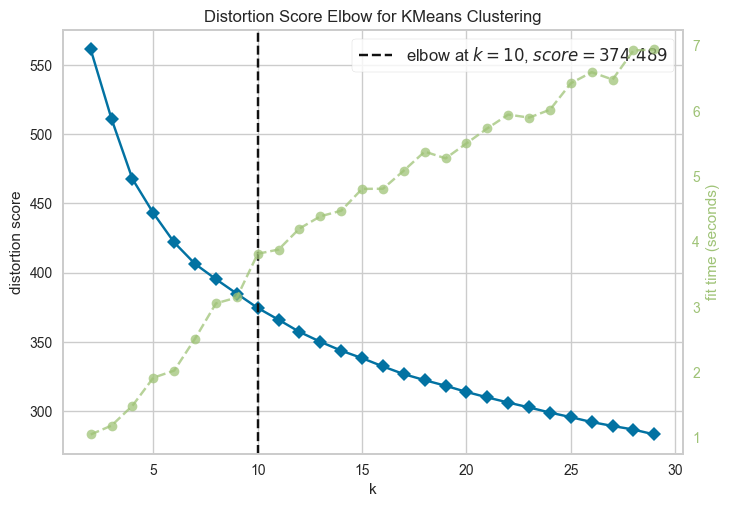

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=10000, n_clusters=29, n_init=100,
                                  random_state=0, tol=0),
                 k=(2, 30))

In [13]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans


kmeans = KMeans(
    n_init=100,
    max_iter=10000,
    tol=0,
    random_state=0
)

kelbow_visualizer(kmeans, weighted_joined_reference_data, k=(2, 30))


### Use them for the analysis

In [14]:
from core import mssw_eval


agraw2_target_stats = {}
for agraw2_path in all_agraw2_data_paths:
    runs_results_bool, final_fpr_mean, fpr_std_err, final_latency_mean, latency_std_err = \
        mssw_eval.all_drifting_batches_randomness_robust(
        agraw2_target_reference_batches[agraw2_path],
        agraw2_target_testing_batches[agraw2_path],
        n_clusters=10,
        n_init=100,
        max_iter=120,
        tol=0,
        true_drift_idx=2,
        min_runs=2
    )
    agraw2_target_stats[agraw2_path] = {
        'runs_results_bool': runs_results_bool,
        'final_fpr_mean': final_fpr_mean,
        'fpr_std_err': fpr_std_err,
        'final_latency_mean': final_latency_mean,
        'latency_std_err': latency_std_err
    }

print('agraw2 STATS')
print(agraw2_target_stats)

min_runs 2
min_runs 2
min_runs 2
min_runs 2
min_runs 2
min_runs 2
agraw2 STATS
{'../Datasets_concept_drift/synthetic_data/abrupt_drift/agraw2_1_abrupt_drift_0_noise_balanced.arff': {'runs_results_bool': [[False, False, False, True, True, True, True], [False, False, True, True, True, True, True], [False, False, False, True, True, True, True], [False, False, False, True, True, True, True], [False, False, False, True, True, True, True]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean': 0.2, 'latency_std_err': 0.0447213595499958}, '../Datasets_concept_drift/synthetic_data/gradual_drift/agraw2_1_gradual_drift_0_noise_balanced_05.arff': {'runs_results_bool': [[False, False, False, True, True, True, True], [False, False, True, True, True, True, True], [False, False, False, True, True, True, True], [False, False, False, True, True, True, True], [False, False, False, True, True, True, True]], 'final_fpr_mean': 0.0, 'fpr_std_err': 0.0, 'final_latency_mean': 0.2, 'latency_std_err'

### Save the results

In [15]:
from eval_helpers import helpers


final_result_dict = {
    'type_of_data': [], 'dataset': [], 'drift': [], 'width': [], 'encoding': [],
    'n_init': [], 'max_iter': [], 'tol': [],
    'FPR_mean': [], 'latency_mean': []
}

for data_path, stats_dict in agraw2_target_stats.items():
    synthetic_filename_info = helpers.synthetic_data_information(data_path)
    encoding = 'target'
    fpr_mean = float(stats_dict['final_fpr_mean'])
    latency_mean = float(stats_dict['final_latency_mean'])
    
    final_result_dict['type_of_data'].append(synthetic_filename_info['type_of_data'])
    final_result_dict['dataset'].append(synthetic_filename_info['dataset_name'])
    final_result_dict['drift'].append(synthetic_filename_info['drift_type'])
    final_result_dict['width'].append(synthetic_filename_info['drift_width'])
    final_result_dict['encoding'].append(encoding)
    final_result_dict['n_init'].append(100)
    final_result_dict['max_iter'].append(120)
    final_result_dict['tol'].append(0)
    final_result_dict['FPR_mean'].append(fpr_mean)
    final_result_dict['latency_mean'].append(latency_mean)
    
final_result_df = pd.DataFrame.from_dict(final_result_dict)
sorted_final_result_df = final_result_df.sort_values(['drift', 'dataset', 'encoding', 'width'])
final_result_df.to_csv('agraw2_target_jupyter.csv', index=False)